In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np


pandas.set_option('display.max_columns', None)

#pandas.set_option('display.max_rows', None) 
pandas.set_option('display.max_rows', 21)  

pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('display.precision', 3)

# Read the data

In [3]:
data = pandas.read_csv(r'../RawDatasets/bank-additional-full.csv',  sep=';', na_values=".")
display(data[0:10])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Grouping columns per type of variable

In [3]:
numericCols = data.select_dtypes(include=np.number).columns.tolist()
categoricalCols = data.select_dtypes(include=object).columns.tolist()
print("Numeric columns:", len(numericCols))
print("Categorical columns:", len(categoricalCols))
print("Total:", len(numericCols) + len(categoricalCols))

Numeric columns: 10
Categorical columns: 11
Total: 21


# Univariate description of the raw data

In [80]:
print("Numeric columns:")
data.describe(include=[np.number])

Numeric columns:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000
mean,40.024,258.285,2.568,962.475,0.173,0.082,93.576,-40.503,3.621,5167.036
std,10.421,259.279,2.770,186.911,0.495,1.571,0.579,4.628,1.734,72.252
min,17.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,4963.600
25%,32.000,102.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.344,5099.100
50%,38.000,180.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000
75%,47.000,319.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100
max,98.000,4918.000,56.000,999.000,7.000,1.400,94.767,-26.900,5.045,5228.100


In [81]:
print("Categorical columns:")
data.describe(include=[object])

Categorical columns:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Boxplots and histograms for numeric variables

Numeric variables:
Age:


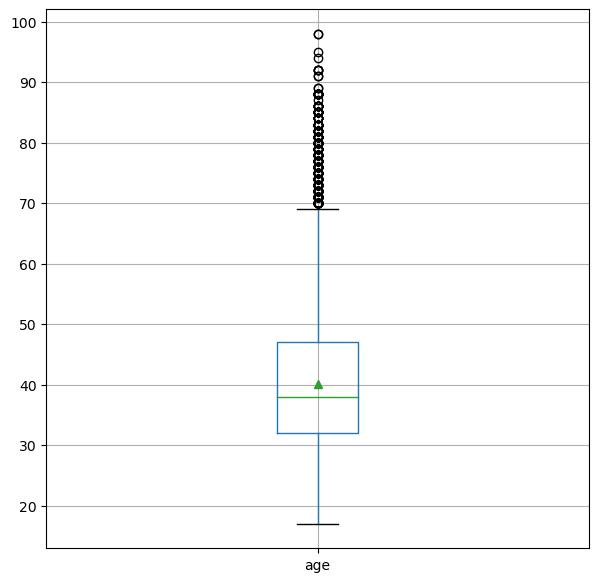

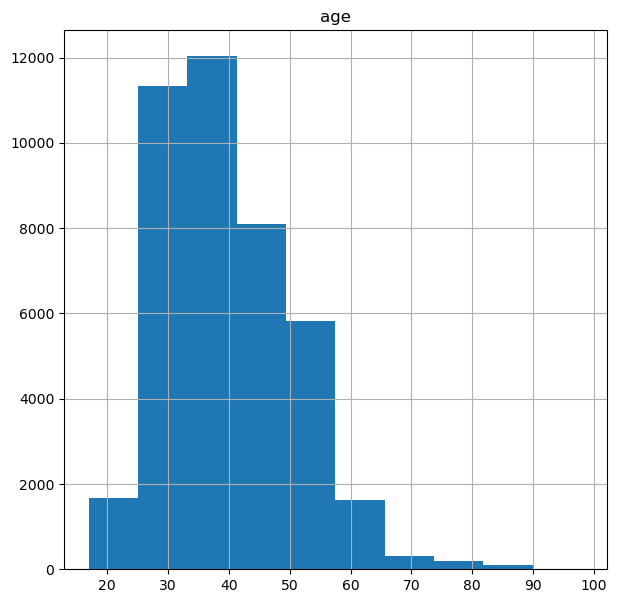

Duration:


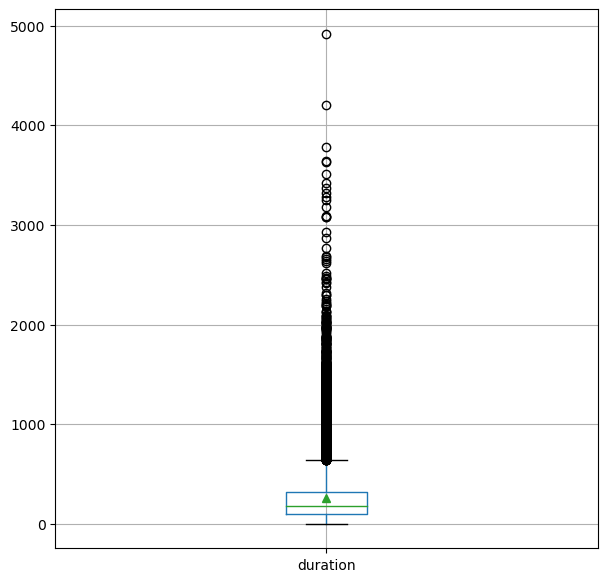

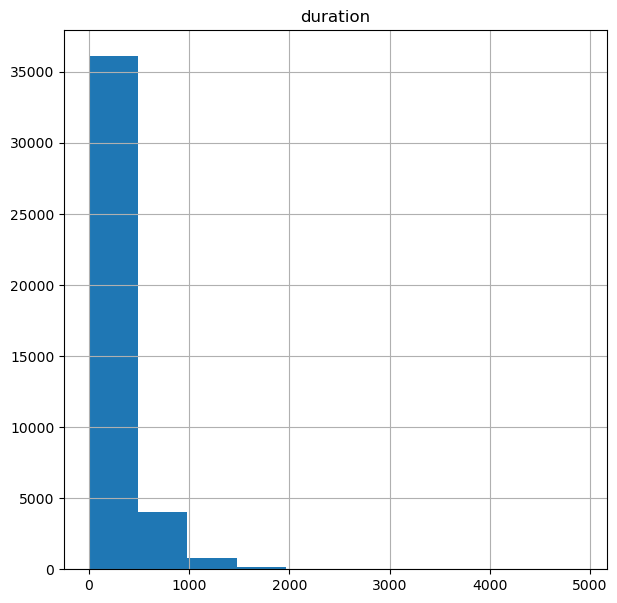

Campaign:


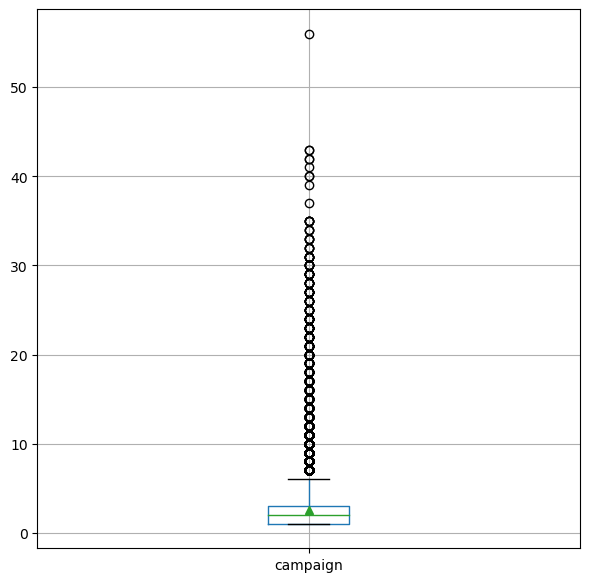

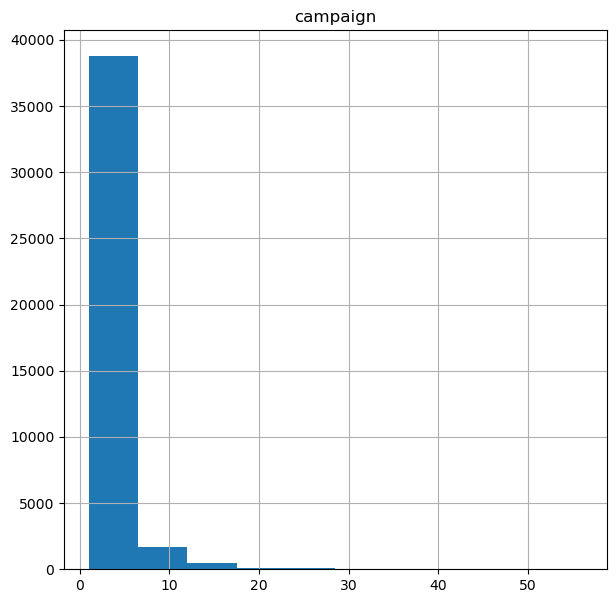

Pdays:


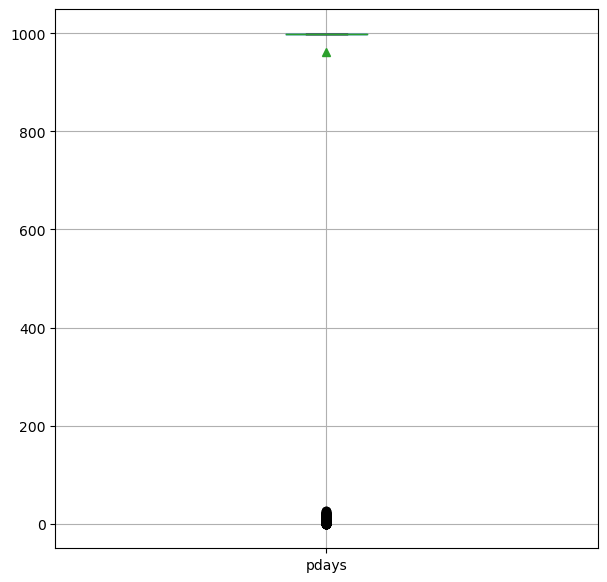

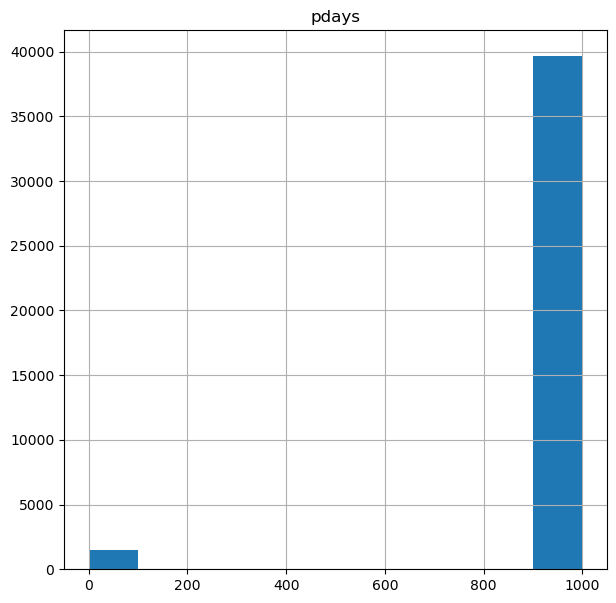

Previous:


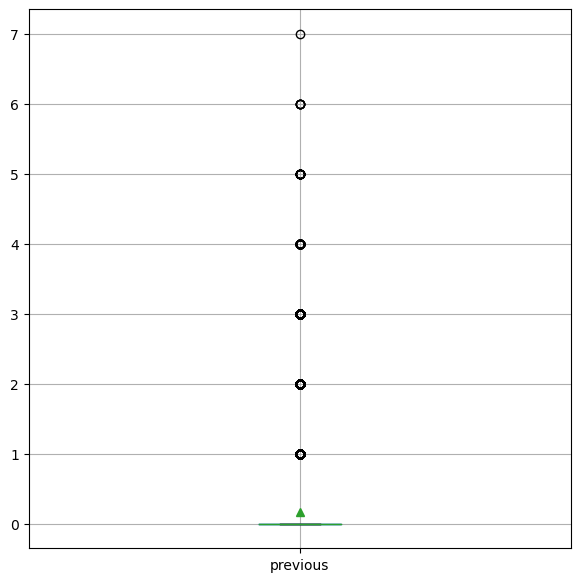

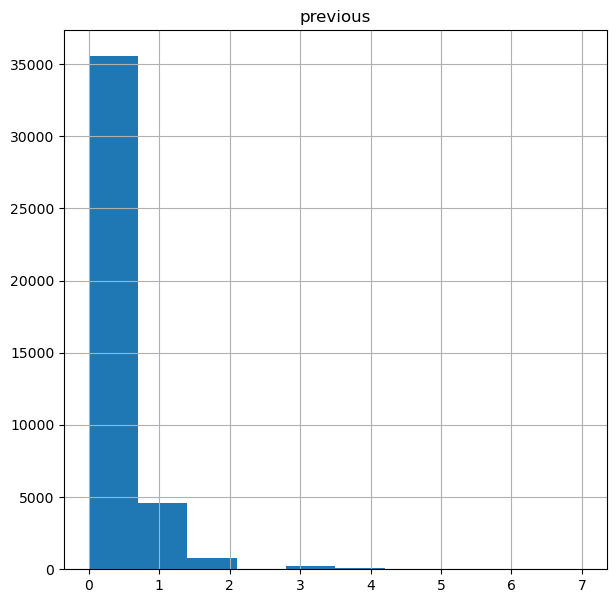

Emp.var.rate:


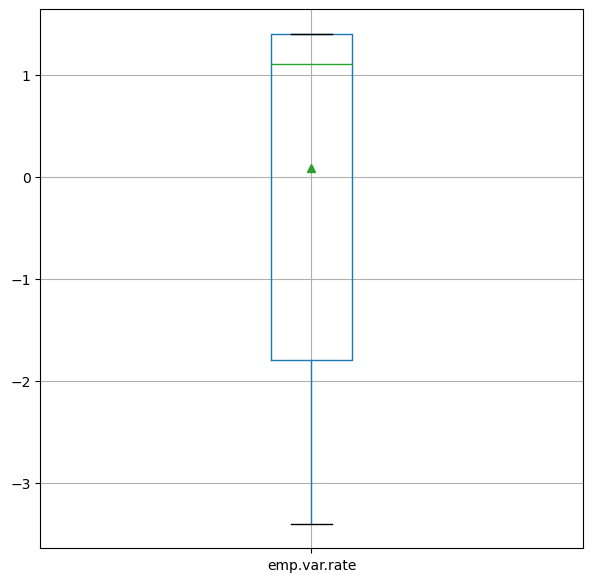

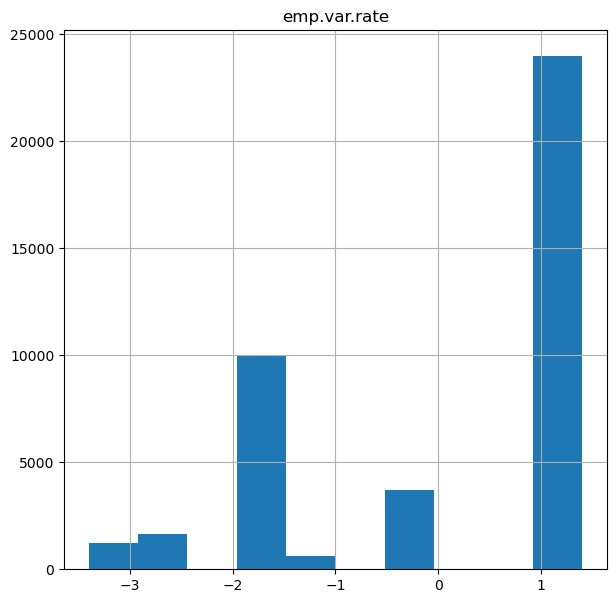

Cons.price.idx:


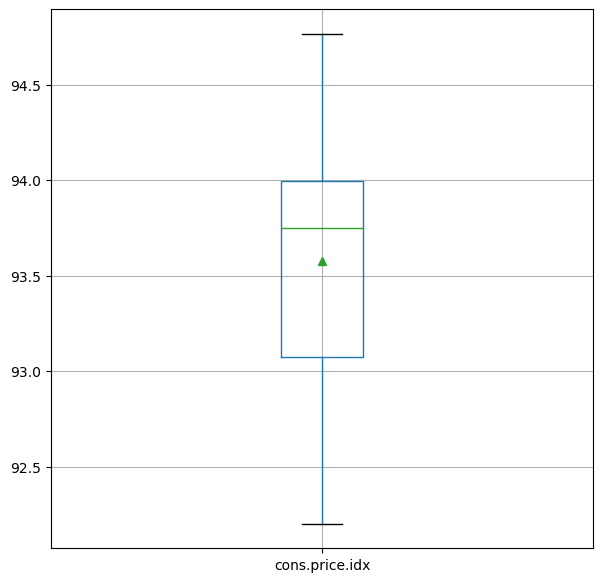

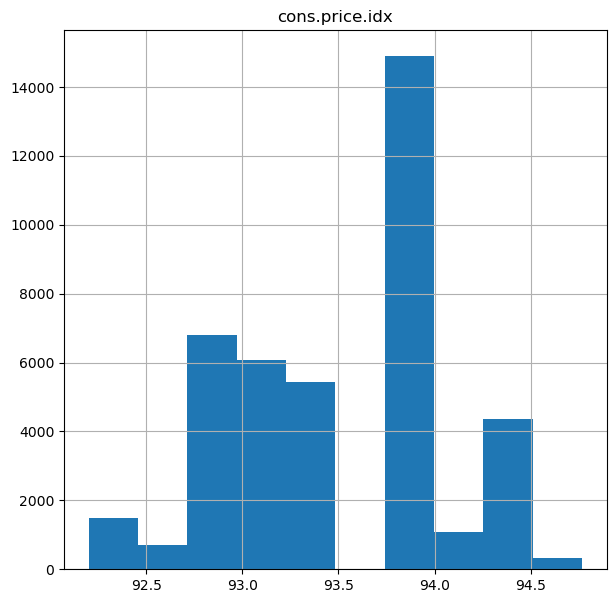

Cons.conf.idx:


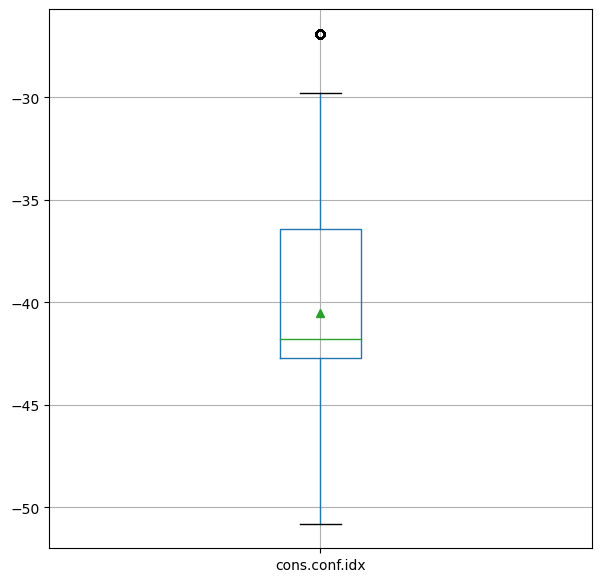

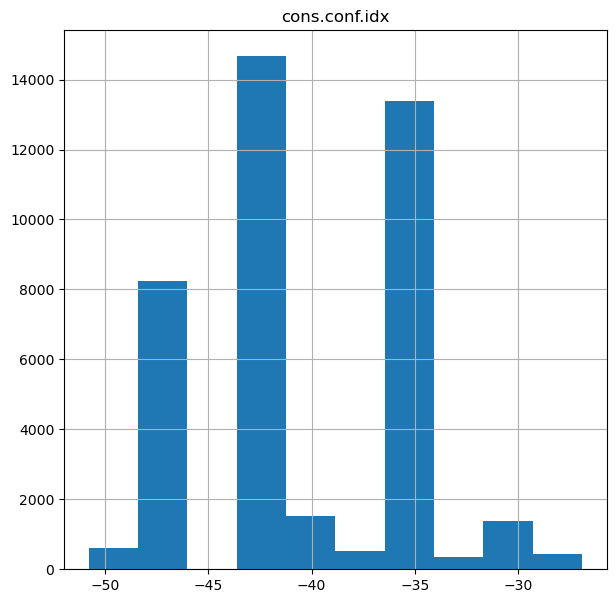

Euribor3m:


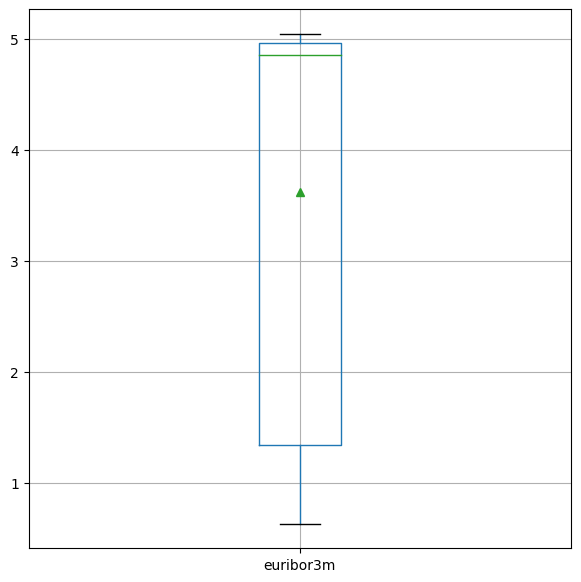

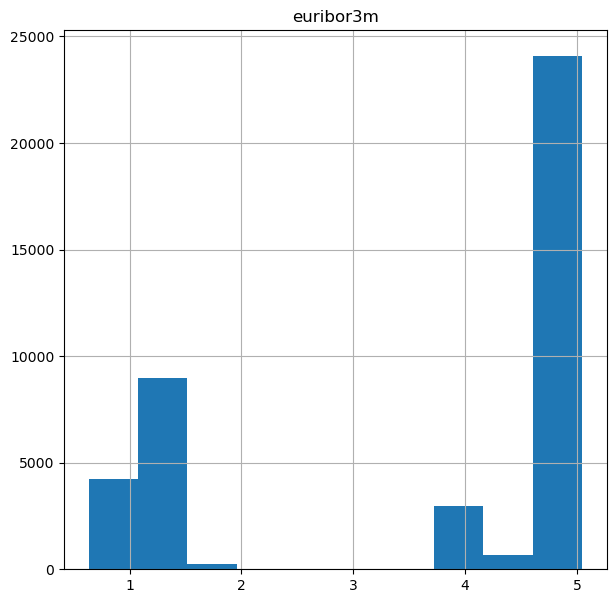

Nr.employed:


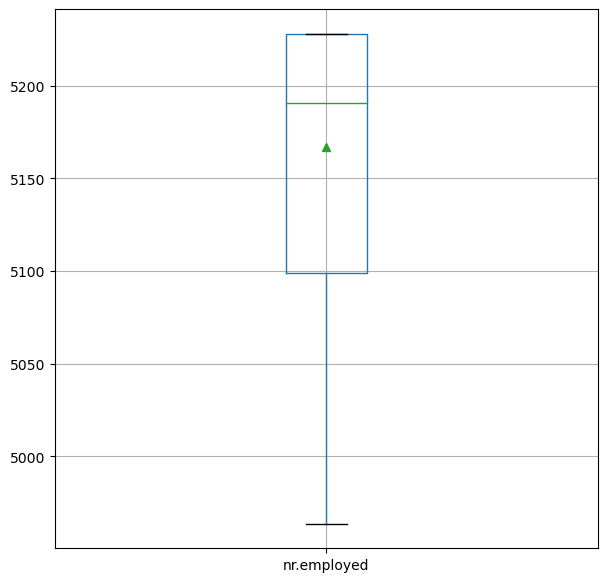

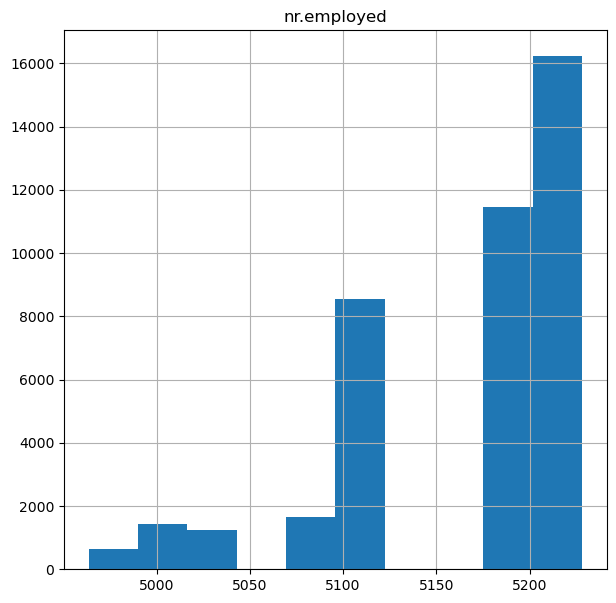

In [82]:
print("Numeric variables:")
for col in numericCols:
    print(col.capitalize() + ":")
    data.boxplot(column=col, meanline=False, showmeans=True, return_type='dict', figsize=[7,7])
    data.hist(column=col,  bins=10, figsize=[7,7])
    plt.show()

## Histograms for categorical variables

Categorical variables:
Job:


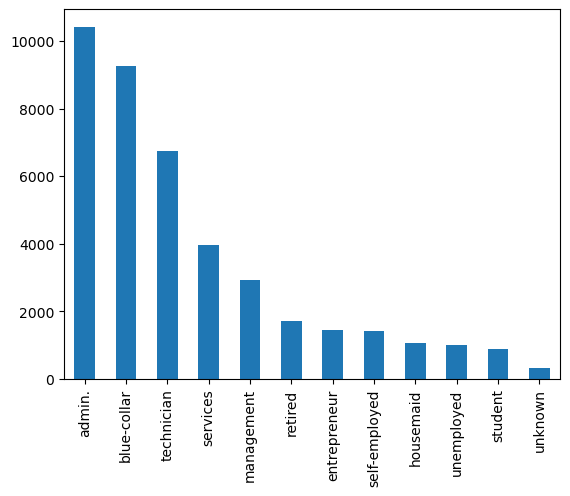

Marital:


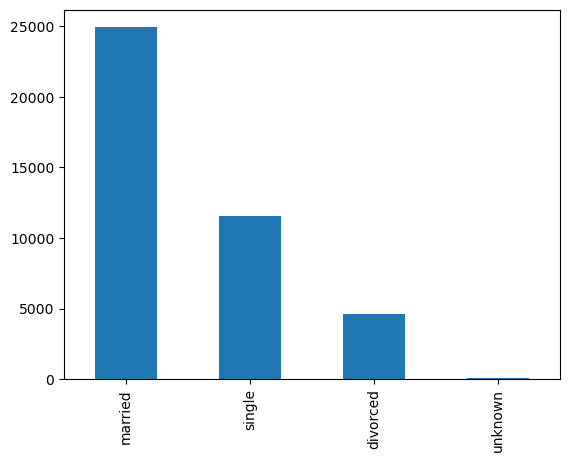

Education:


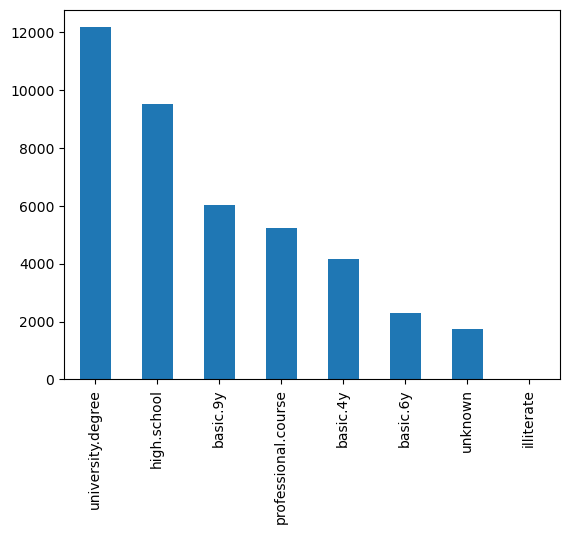

Default:


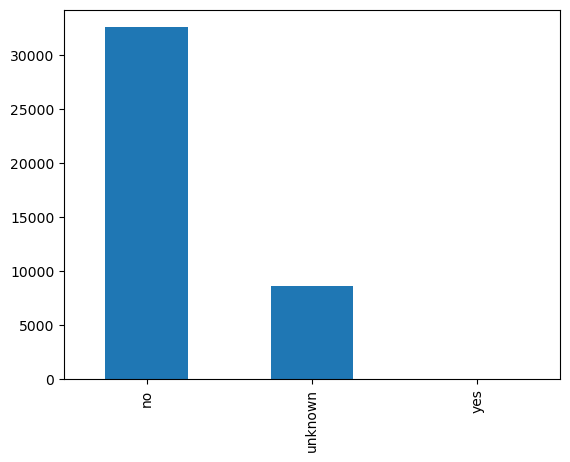

Housing:


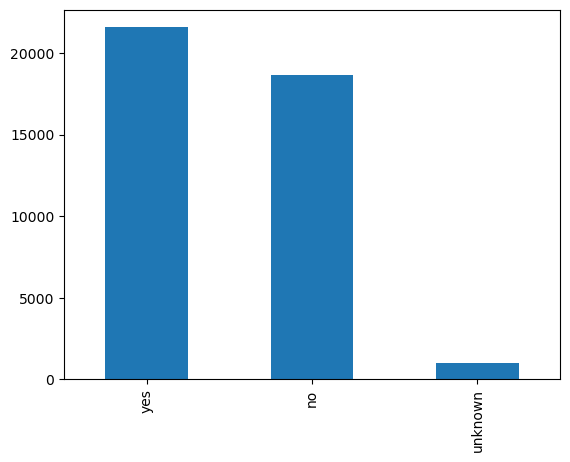

Loan:


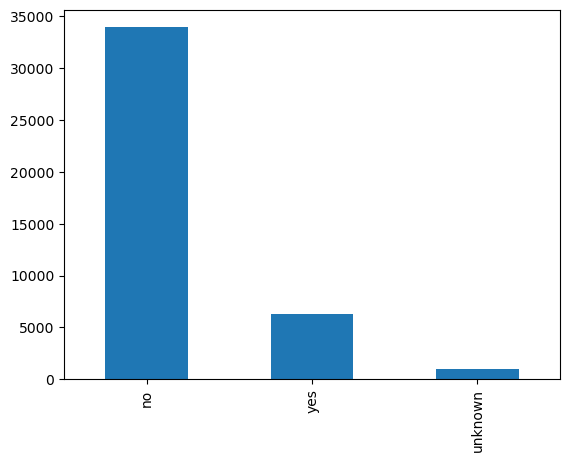

Contact:


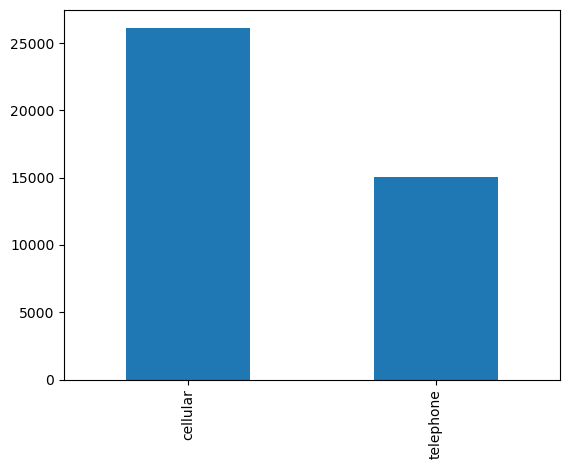

Month:


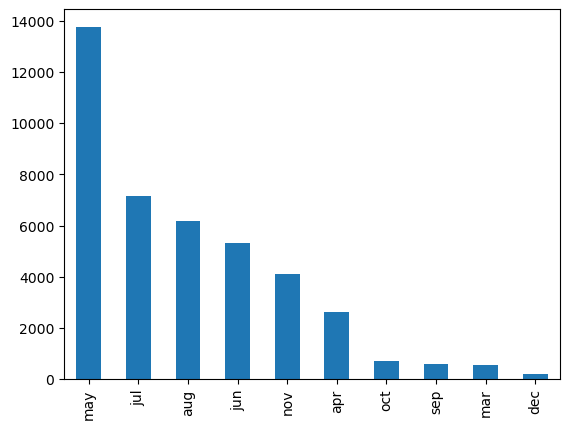

Day_of_week:


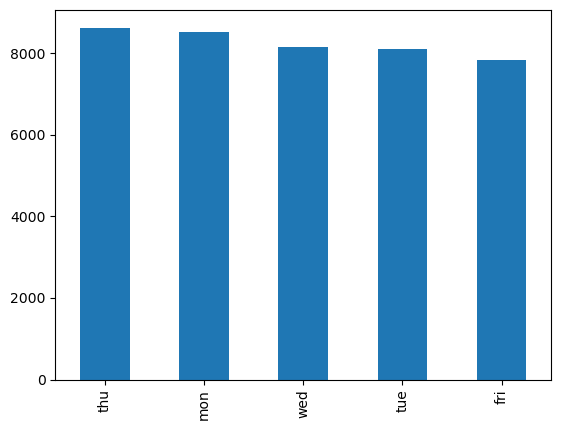

Poutcome:


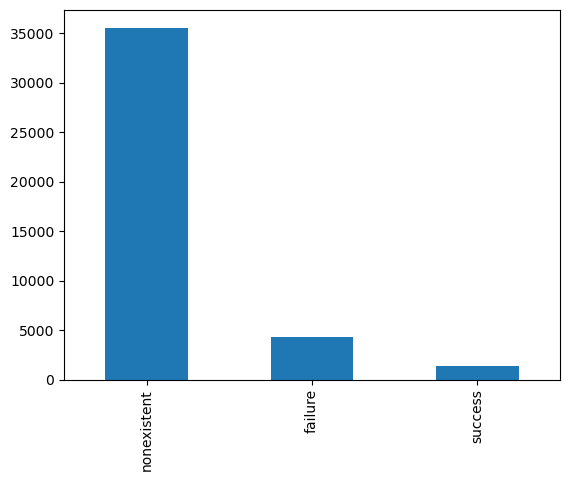

Y:


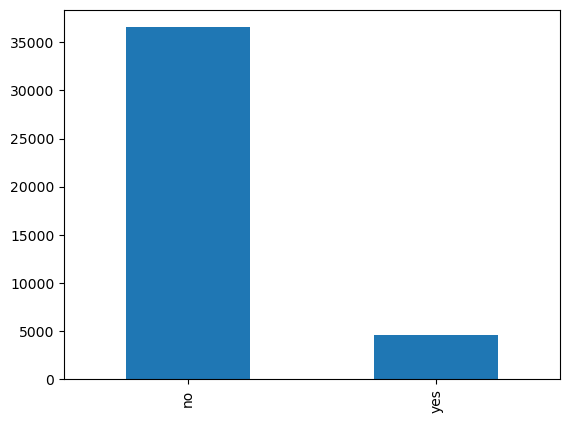

In [83]:
print("Categorical variables:")
for col in categoricalCols:
    print(col.capitalize() + ":")
    data.loc[:,col].value_counts().plot(kind='bar')
    plt.show()

## Identify errors or outliers - univariate analysis

In [84]:
print("Outliers count in numeric variables:")
for col in numericCols:
    count = len(data[data.loc[:,col]>data.loc[:,col].mean()+2*data.loc[:,col].std()])
    print(col.capitalize() + ":", count)

Outliers count in numeric variables:
Age: 910
Duration: 1902
Campaign: 1377
Pdays: 0
Previous: 1064
Emp.var.rate: 0
Cons.price.idx: 128
Cons.conf.idx: 1071
Euribor3m: 0
Nr.employed: 0


### Univariate analysis depending on label

In [85]:
print("Numeric variables:")
for col in numericCols:
    print(col.capitalize() + ":")
    groupby = data.groupby(col).y
    display(groupby.describe())


Numeric variables:
Age:


,count,unique,top,freq
age,,,,
17,5,2,no,3
18,28,2,no,16
19,42,2,no,22
20,65,2,no,42
21,102,2,no,73
...,...,...,...,...
91,2,1,no,2
92,4,2,yes,3
94,1,1,no,1


Duration:


,count,unique,top,freq
duration,,,,
0,4,1,no,4
1,3,1,no,3
2,1,1,no,1
3,3,1,no,3
4,12,1,no,12
...,...,...,...,...
3631,1,1,yes,1
3643,1,1,yes,1
3785,1,1,no,1


Campaign:


,count,unique,top,freq
campaign,,,,
1,17642,2,no,15342
2,10570,2,no,9359
3,5341,2,no,4767
4,2651,2,no,2402
5,1599,2,no,1479
...,...,...,...,...
40,2,1,no,2
41,1,1,no,1
42,2,1,no,2


Pdays:


,count,unique,top,freq
pdays,,,,
0,15,2,yes,10
1,26,2,no,18
2,61,2,yes,37
3,439,2,yes,298
4,118,2,yes,63
...,...,...,...,...
22,3,2,yes,2
25,1,1,yes,1
26,1,1,yes,1


Previous:


,count,unique,top,freq
previous,,,,
0,35563,2,no,32422
1,4561,2,no,3594
2,754,2,no,404
3,216,2,yes,128
4,70,2,yes,38
5,18,2,yes,13
6,5,2,yes,3
7,1,1,no,1


Emp.var.rate:


,count,unique,top,freq
emp.var.rate,,,,
-3.4,1071,2,no,617
-3.0,172,2,yes,88
-2.9,1663,2,no,1069
-1.8,9184,2,no,7723
-1.7,773,2,yes,403
-1.1,635,2,no,334
-0.2,10,2,no,9
-0.1,3683,2,no,3451
1.1,7763,2,no,7523


Cons.price.idx:


,count,unique,top,freq
cons.price.idx,,,,
92.201,770,2,no,506
92.379,267,2,no,161
92.431,447,2,no,267
92.469,178,2,no,112
92.649,357,2,no,189
...,...,...,...,...
94.199,303,2,no,153
94.215,311,2,yes,176
94.465,4374,2,no,4186


Cons.conf.idx:


,count,unique,top,freq
cons.conf.idx,,,,
-50.8,128,2,no,70
-50.0,282,2,no,156
-49.5,204,2,no,111
-47.1,2458,2,no,2016
-46.2,5794,2,no,5270
...,...,...,...,...
-33.0,172,2,yes,88
-31.4,770,2,no,506
-30.1,357,2,no,189


Euribor3m:


,count,unique,top,freq
euribor3m,,,,
0.634,8,2,yes,6
0.635,43,2,yes,22
0.636,14,2,no,11
0.637,6,2,yes,5
0.638,7,2,yes,5
...,...,...,...,...
4.967,643,2,no,610
4.968,992,2,no,935
4.970,172,2,no,168


Nr.employed:


,count,unique,top,freq
nr.employed,,,,
4963.6,635,2,no,334
4991.6,773,2,yes,403
5008.7,650,2,yes,369
5017.5,1071,2,no,617
5023.5,172,2,yes,88
5076.2,1663,2,no,1069
5099.1,8534,2,no,7442
5176.3,10,2,no,9
5191.0,7763,2,no,7523


# Bi-variate analysis

In [86]:
print("Correlations between numeric columns:")
display(data.corr(method='pearson'))

Correlations between numeric columns:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000e+00,-8.657e-04,0.005,-0.034,0.024,-3.707e-04,8.567e-04,0.129,0.011,-0.018
duration,-8.657e-04,1.000e+00,-0.072,-0.048,0.021,-2.797e-02,5.312e-03,-0.008,-0.033,-0.045
campaign,4.594e-03,-7.170e-02,1.000,0.053,-0.079,1.508e-01,1.278e-01,-0.014,0.135,0.144
pdays,-3.437e-02,-4.758e-02,0.053,1.000,-0.588,2.710e-01,7.889e-02,-0.091,0.297,0.373
previous,2.436e-02,2.064e-02,-0.079,-0.588,1.000,-4.205e-01,-2.031e-01,-0.051,-0.454,-0.501
emp.var.rate,-3.707e-04,-2.797e-02,0.151,0.271,-0.420,1.000e+00,7.753e-01,0.196,0.972,0.907
cons.price.idx,8.567e-04,5.312e-03,0.128,0.079,-0.203,7.753e-01,1.000e+00,0.059,0.688,0.522
cons.conf.idx,1.294e-01,-8.173e-03,-0.014,-0.091,-0.051,1.960e-01,5.899e-02,1.000,0.278,0.101
euribor3m,1.077e-02,-3.290e-02,0.135,0.297,-0.454,9.722e-01,6.882e-01,0.278,1.000,0.945
nr.employed,-1.773e-02,-4.470e-02,0.144,0.373,-0.501,9.070e-01,5.220e-01,0.101,0.945,1.000


Scatter matrices for correlations between some numerical variables:


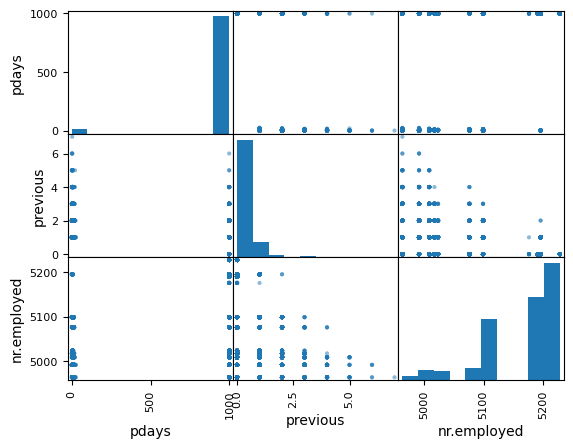

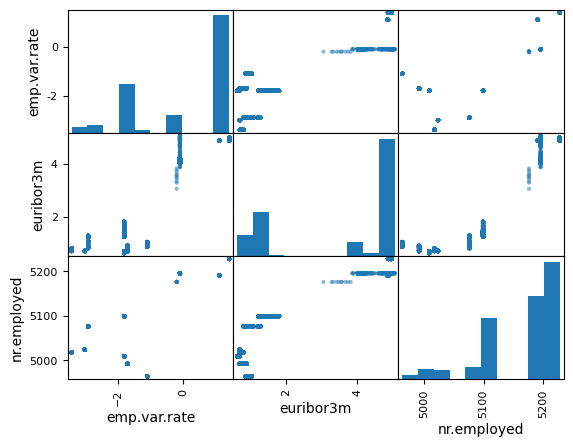

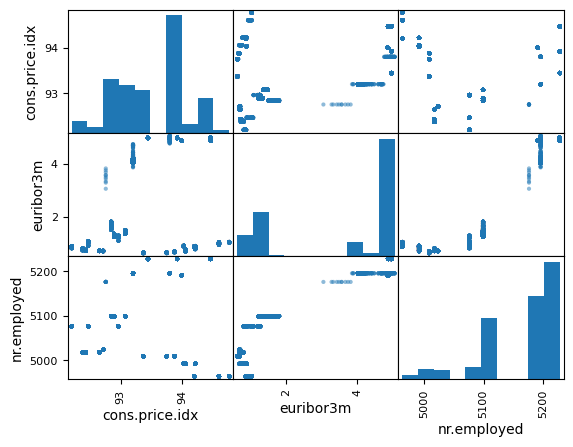

In [87]:
# Scatter matrices for some numeric columns with high correlations
plotting.scatter_matrix(data[['pdays', 'previous', 'nr.employed']])
plotting.scatter_matrix(data[['emp.var.rate', 'euribor3m', 'nr.employed']])
plotting.scatter_matrix(data[['cons.price.idx', 'euribor3m', 'nr.employed']])
print('Scatter matrices for correlations between some numerical variables:')

#  Missing data

In [88]:
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

# Discretize variable pdays

,count,unique,top,freq
pdays,,,,
1,1177,2,yes,774
2,338,2,yes,193
3,4110,2,no,3578
4,35563,2,no,32422


New plots for Pdays:


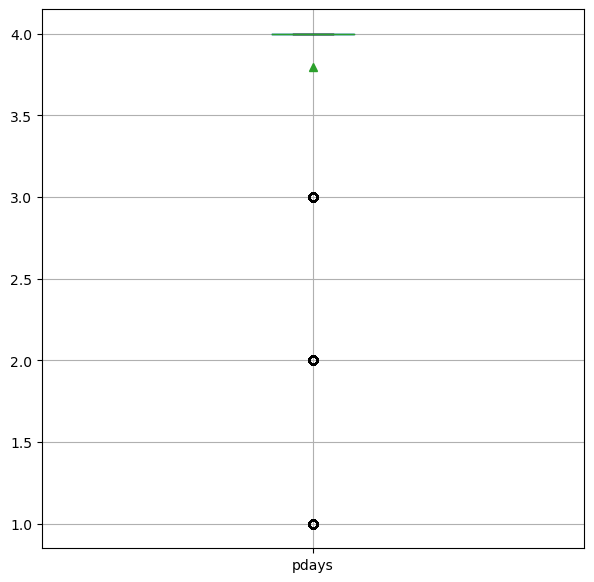

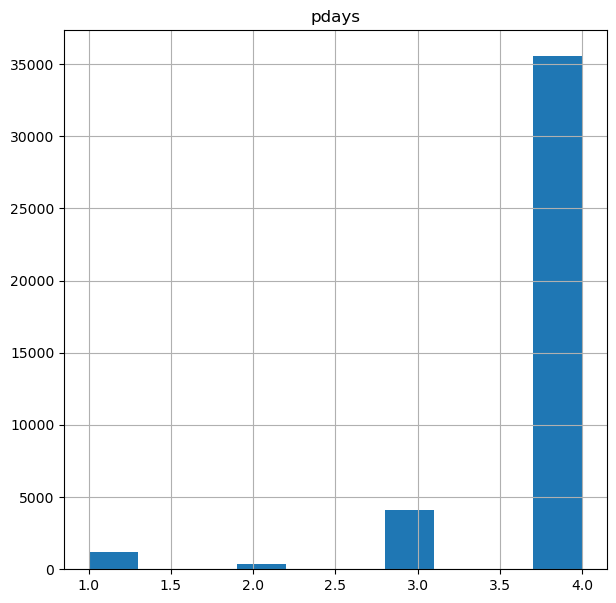

In [89]:
for i in data.index:
    if data['previous'][i] == 0:
        data.at[i,'pdays'] = 4      # Never
    elif data['pdays'][i] <= 7:
        data.at[i,'pdays'] = 1      # Few days ago
    elif data['pdays'][i] <= 30:
        data.at[i,'pdays'] = 2      # Some days ago
    else:
        data.at[i,'pdays'] = 3      # A lot of days ago

data.to_csv(r'../Datasets/Analysis_Missings/analysis-missings.csv')

groupby = data.groupby('pdays').y
display(groupby.describe())

print("New plots for Pdays:")
data.boxplot(column='pdays', meanline=False, showmeans=True, return_type='dict', figsize=[7,7])
data.hist(column='pdays',  bins=10, figsize=[7,7])
plt.show()

# Looking for inbalance in the dataset

In [6]:
yesCount = 0
noCount = 0

for i in data.index:
    if data['y'][i] == 'yes':
        yesCount += 1

for i in data.index:
    if data['y'][i] == 'no':
        noCount += 1

print(yesCount/41188)
print(noCount/41188)
print(yesCount + noCount)

0.11265417111780131
0.8873458288821987
41188
